In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('Steel.txt', sep ="\t")

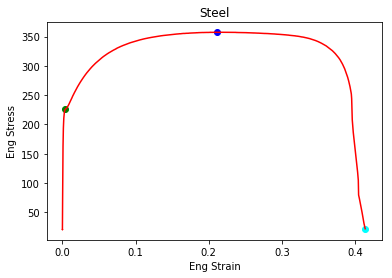

y:225.60875167785235
max y:357.28853691275174
max x:0.41418358000000005


In [3]:
y = df.iloc[:,0]#force
x = df.iloc[:,1]#disp
index = -1
for i in range(len(y)):
    if(math.isnan(y[i])):
        index = i
        break
y = y[:index]
x = x[:index]
#changing force to stress MegaNewton/m2
#area = 18.625 * 10^-6 m2
for i in range(len(y)):
    y[i] = y[i]/(18.625 * 0.001)#stress
#convert displacement to strain
#lenth = 50 mm
for j in range(len(x)):
    x[j] = x[j]/50#strain

    
max_y = max(y)                                    ## Steel engineering stress vs strain curve
max_x = max(x)
index = index1 = 1
for i in range(len(y)):
    if y[i] == max_y:
        index = i
        break
for i in range(len(x)):
    if x[i] == max_x:
        index1 = i
        break

plt.scatter(x[index],y[index],color="blue")
plt.scatter(x[25],y[25],color="green")
plt.scatter(x[index1],y[index1],color="cyan")
plt.plot(x,y,color ="red")
plt.ylabel('Eng Stress')
plt.xlabel('Eng Strain')
plt.title('Steel')
plt.show()
print(f"y:{y[25]}")
print(f"max y:{max_y}")
print(f"max x:{max_x}")

In [4]:
index2 = index3 = 1  #calculating the Youngs modulus
for i in range(len(y)):
    if y[i]>=50:
        index2 =i
        break

for i in range(len(y)):
    if y[i]>=200:
        index3 =i
        break

slope = (y[index3] - y[index2])/(x[index3] - x[index2])
print(slope)

105396.21587299375


In [5]:
#finding index of maximum stress/UTS
y = list(y)
maxIndexStress = y.index(max(y))
maxStress = y[maxIndexStress]
coresspondingStrain = x[maxIndexStress]

print(maxStress, coresspondingStrain)

357.28853691275174 0.21101796


In [6]:
trueStrain = [math.log(1 + e) for e in x]
trueStress = [y[i]*(1 + x[i]) for i in range(len(y))]

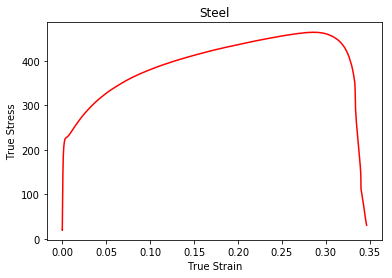

In [7]:
plt.plot(trueStrain,trueStress,color ="red") # steel true stress vs strain curve
plt.ylabel('True Stress')
plt.xlabel('True Strain')
plt.title('Steel')
plt.show()

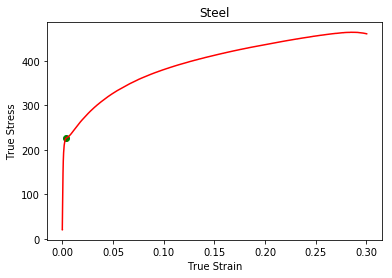

In [8]:
idx = 1   # trimming off the end part of the data from true stress vs strain, for curve fitting
for i in range(len(trueStrain)):
    if trueStrain[i]>=0.30:
        idx= i
        break

trim_trueStrain = trueStrain[:i+1]
trim_trueStress = trueStress[:i+1]
plt.plot(trim_trueStrain,trim_trueStress,color ="red")
plt.scatter(trim_trueStrain[25],trim_trueStress[25],color="green")
plt.ylabel('True Stress')
plt.xlabel('True Strain')
plt.title('Steel')
plt.show()

In [9]:
from scipy.optimize import curve_fit

In [10]:
#fitting function
def fittingFunc(e,k,n):
    return k*(e**n)

xdata = trim_trueStrain[25:]
ydata = trim_trueStress[25:]
popt, pcov = curve_fit(fittingFunc, xdata, ydata)

[6.01475766e+02 2.01191373e-01]


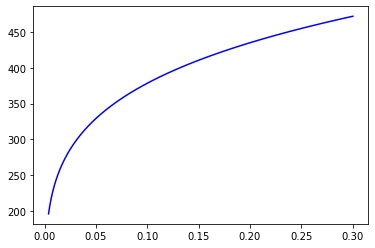

In [11]:
print(popt)
plt.plot(xdata,fittingFunc(xdata,*popt),'b-')
plt.show()

Starting work on Aluminium 

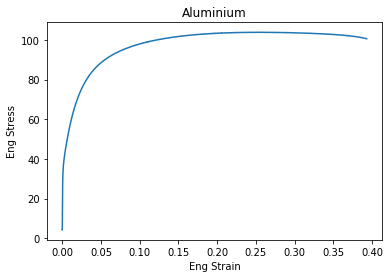

In [10]:
df1 = pd.read_csv('Alum.txt',sep="\t") # aluminium engineering stress and strain curve.
x1 = df1.iloc[:,0]
y1 = df1.iloc[:,1]
plt.plot(x1,y1)
plt.xlabel('Eng Strain')
plt.ylabel('Eng Stress')
plt.title('Aluminium')
plt.show()

In [11]:
y1 = list(y1) # Getting the Value of UTS
maxIndexStress = y1.index(max(y1))
maxStress = y1[maxIndexStress]
coresspondingStrain = x1[maxIndexStress]

print(maxStress, coresspondingStrain)

103.8324267 0.25097528


In [12]:
index4 = index5 = 1  # getting the value of Youngs Modulus
for i in range(len(y1)):
    if y1[i]>=10:
        index4 =i
        break

for i in range(len(y1)):
    if y1[i]>=34:
        index5 =i
        break

slope = (y1[index5] - y1[index4])/(x1[index5] - x1[index4])
print(slope)

22370.02402347555


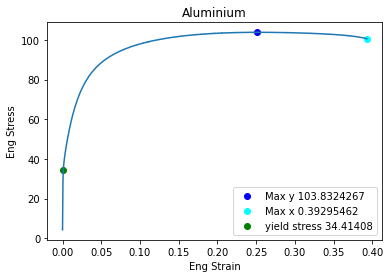

In [16]:
max_y = max(y1) # getting the value of yield stress,UTS, ductility and printing them
max_x = max(x1)
index = index1 = 1
for i in range(len(y1)):
    if y1[i] == max_y:
        index = i
        break
for i in range(len(x1)):
    if x1[i] == max_x:
        index1 = i
        break

        
plt.plot(x1,y1)
plt.scatter(x1[index],y1[index],color="blue",label=f"Max y {y1[index]}")
plt.scatter(x1[index1],y1[index1],color="cyan",label=f"Max x {x1[index1]}")
plt.scatter(x1[10],y1[10],color="green",label=f"yield stress {y1[10]}")
plt.xlabel('Eng Strain')
plt.ylabel('Eng Stress')
plt.title('Aluminium')
plt.legend()
plt.show()

In [17]:
trueStrain1 = [math.log(1 + e) for e in x1]
trueStress1 = [y1[i]*(1 + x1[i]) for i in range(len(y1))]

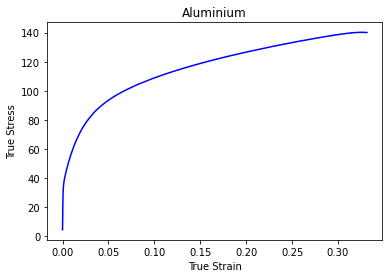

In [18]:
plt.plot(trueStrain1,trueStress1,color ="blue") # Aluminium True stress vs strain curve
plt.ylabel('True Stress')
plt.xlabel('True Strain')
plt.title('Aluminium')
plt.show()

[184.69567552   0.2339861 ]


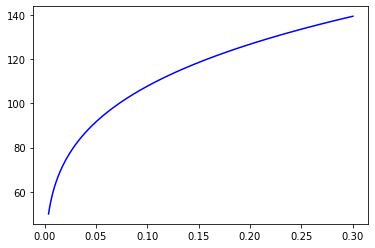

In [19]:
xdata1 = trueStrain1[10:] # Curve fitting on plastic part
ydata1 = trueStress1[10:]

def fittingFunc(e,k,n):
    return k*(e**n)

popt, pcov = curve_fit(fittingFunc, xdata1, ydata1)

print(popt)
plt.plot(xdata,fittingFunc(xdata,*popt),'b-')
plt.show()